Arpit Nigam
Ml May Batch 2
Major Project

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [41]:
twitter_data = pd.read_csv("Information.csv", encoding = 'latin1')
twitter_data.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


Exploring the data

In [42]:
twitter_data.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [43]:
twitter_data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


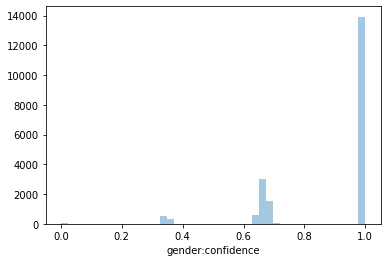

In [44]:
sns.distplot(twitter_data['gender:confidence'],kde=False)

Feature Selection and Feature Engineering

In [45]:

data = twitter_data.loc[(twitter_data['gender:confidence']>0.5) & (twitter_data['gender']!='unknown') & (twitter_data['profile_yn:confidence']==1) ]
data.shape

(18009, 26)

In [46]:
data = data.loc[:,['description','text','gender']]
data.head(5)

,description,text,gender
0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,male
1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,male
2,louis whining and squealing and all,i absolutely adore when louis starts the songs...,male
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,female


In [47]:
data.dropna()

,description,text,gender
0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,male
1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,male
2,louis whining and squealing and all,i absolutely adore when louis starts the songs...,male
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,male
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,female
...,...,...,...
20045,(rp),"@lookupondeath ...Fine, and I'll drink tea too...",female
20046,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...,male
20047,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...,male
20048,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...,female


In [48]:
data.shape

(18009, 3)

Data Cleaning and Data Preprocessing

In [49]:
import re

def cleaning(s):
    s = str(s)
    s = re.sub(r'@[a-zA-Z0-9_]+','',s) #removing @Username
    s = s.lower()
    s = s.replace("'s",' is')
    s = s.replace("'re",' are')
    s = s.replace("'ve",' have')
    s = re.sub('\s\W',' ',s) #whitespace characters
    s = re.sub(r'http\S+', '', s ,flags=re.MULTILINE) #Removing URls
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = re.sub(r' [a-zA-Z0-9_] ',' ',s)#Removing single letters 
    # Removing some Diacritic letter
    s = s.replace("ù","")
    s = s.replace("û", "")
    s = s.replace("âù", "")
    s = s.replace("ü", "")
    s = s.replace("å", "")
    s = s.replace("â", "")
    s = s.replace("ä", "")
    s = s.replace("ï", "")
    s = s.replace("î", "")
    s = s.replace("é", "")
    s = s.replace("è", "")
    s = s.replace("ô", "")
    s = s.replace("", "")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s = s.replace(" d ",' the ')
    
    return s


In [50]:
data['Description'] = [cleaning(s) for s in data['description']]
data['Tweets'] = [cleaning(s) for s in data['text']]
data.head(5)

,description,text,gender,Description,Tweets
0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,male,i sing my own rhythm,robbie responds to critics after win against e...
1,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,male,i the author of novels filled with family dram...,it felt like they were my friends and was liv...
2,louis whining and squealing and all,i absolutely adore when louis starts the songs...,male,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,male,mobile guy ers shazam google kleiner perkins y...,hi looking at the url do you use don typically...
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,female,ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with th...


In [51]:
data['text'][27]

'Fuck you ! NASA is awesome. https://t.co/wIUkltDTyO'

In [52]:
data['Tweets'][27]

'fuck you nasa is awesome '

In [53]:
data['text'][64]

"https://t.co/nRN2mGLd2E\nAm I the only one who loves the part with Merlin and Regina's face? :D #OUAT"

In [54]:
data['Tweets'][64]

' am the only one who loves the part with merlin and regina is face ouat'

In [55]:
import nltk as nlp
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

In [56]:
All_tweets = data['Tweets']
All_descriptions = data['Description']

In [57]:
nlp.download('punkt')

[nltk_data] Downloading package punkt to /home/arpit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
from nltk.tokenize import word_tokenize

In [59]:
nlp.download('wordnet')

[nltk_data] Downloading package wordnet to /home/arpit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
from nltk.stem.wordnet import WordNetLemmatizer
lematized_tweets = WordNetLemmatizer()


In [61]:
Tweets_list = []
for tweet in All_tweets:
    tweet = word_tokenize(tweet)
    tweet = [word for word in tweet if word not in stopwords]
    tweet = [lematized_tweets.lemmatize(word) for word in tweet]
    tweet = " ".join(tweet)
    Tweets_list.append(tweet)


In [62]:
Tweets_list[:5]

['robbie responds critic win eddie edward worldtitleseries',
 'felt like friend living story retired ian',
 'absolutely adore louis start song hit hard feel good',
 'hi looking url use typically see advanced user',
 'watching neighbour sky catching neighbs xxx xxx']

In [63]:
description_list =[]
for description in All_descriptions:
    description = word_tokenize(description)
    description = [word for word in description if word not in stopwords]
    description = [ lematized_tweets.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)
    
description_list[:4]

['sing rhythm',
 'author novel filled family drama romance',
 'louis whining squealing',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer']

In [64]:
clean_data = pd.DataFrame({'Description':description_list,'Tweets':Tweets_list,'Gender':data.gender})

In [65]:
clean_data.head(4)

,Description,Tweets,Gender
0,sing rhythm,robbie responds critic win eddie edward worldt...,male
1,author novel filled family drama romance,felt like friend living story retired ian,male
2,louis whining squealing,absolutely adore louis start song hit hard fee...,male
3,mobile guy er shazam google kleiner perkins ya...,hi looking url use typically see advanced user,male


In [66]:
clean_data['Gender'].value_counts()

female    6459
male      5884
brand     5666
Name: Gender, dtype: int64

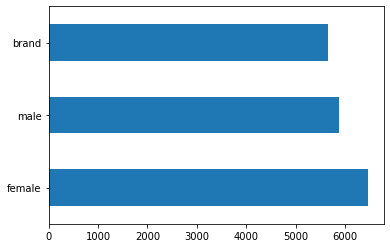

In [67]:
clean_data['Gender'].value_counts().plot(kind='barh')

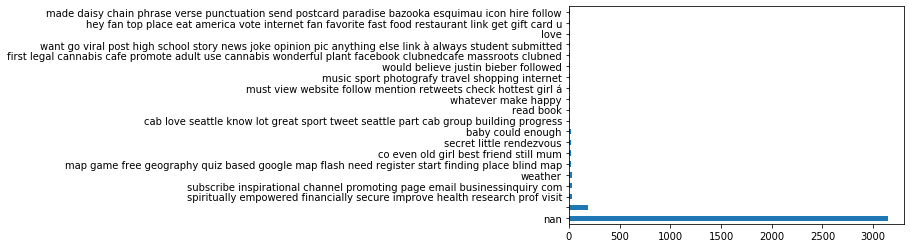

In [68]:
clean_data['Description'].value_counts()[:20].plot(kind='barh')

In [69]:
clean_data.isnull().sum()

Description    0
Tweets         0
Gender         0
dtype: int64

In [70]:
clean_data['Description'].unique()

array(['sing rhythm', 'author novel filled family drama romance',
       'louis whining squealing', ...,
       'kingdom heart alice sims minecraft hard rock bookworm nerd geek need go',
       'everything winnipeg', 'code linux food oh art'], dtype=object)

In [71]:
clean_data['Description'].value_counts()

nan                                                                                                                         3144
                                                                                                                             184
spiritually empowered financially secure improve health research prof visit                                                   33
subscribe inspirational channel promoting page email businessinquiry com                                                      33
weather                                                                                                                       33
                                                                                                                            ... 
ken god al jou suksesse lost without god gee roomy en koekies en eks gelukkig girlfriend amazing nmmu accounting student       1
ªá ªá                                                                                            

In [72]:
clean_data['Gender'].value_counts()

female    6459
male      5884
brand     5666
Name: Gender, dtype: int64

In [73]:
Male = clean_data[clean_data['Gender'] == 'male']
Female = clean_data[clean_data['Gender'] == 'female']
Brand = clean_data[clean_data['Gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]

In [74]:
Female_Words

like      447
get       370
one       345
day       341
love      316
go        290
make      283
time      279
people    241
want      217
know      210
got       202
amp       199
new       195
best      189
thing     179
õ         178
last      174
need      173
back      169
dtype: int64

In [75]:
Male_Words

get       356
like      344
one       275
time      246
go        226
day       213
love      206
new       205
make      194
people    190
know      190
good      183
got       181
see       167
back      160
think     159
need      159
best      150
want      149
amp       147
dtype: int64

In [76]:
Brand_words

weather    2217
get        1304
channel    1141
update     1131
new         238
amp         183
u           166
one         155
like        146
make        144
dtype: int64

Q1) What are the most common emotions/words used by Males and Females?

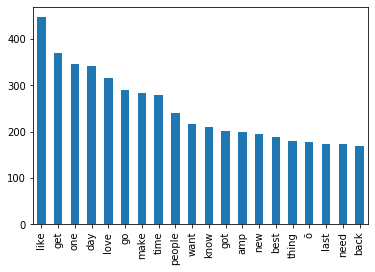

In [77]:
Female_Words.plot(kind='bar',stacked=True)

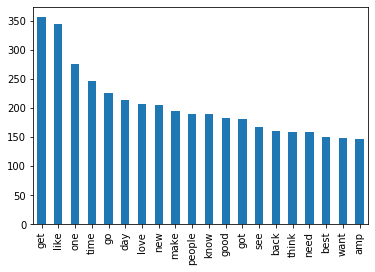

In [78]:
Male_Words.plot(kind='bar',stacked=True)

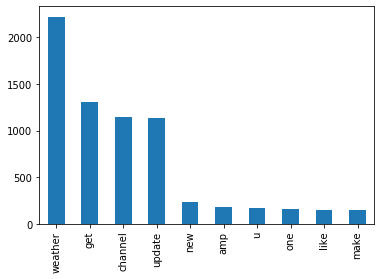

In [79]:
Brand_words.plot(kind='bar',stacked=True)

In [80]:
clean_data.to_csv('Cleaned.csv')

In [81]:
misspell_data = pd.read_csv("aspell.txt",sep=":",names=["correction","misspell"])
misspell_data.misspell = misspell_data.misspell.str.strip()
misspell_data.misspell = misspell_data.misspell.str.split(" ")
misspell_data = misspell_data.explode("misspell").reset_index(drop=True)
misspell_data.drop_duplicates("misspell",inplace=True)
miss_corr = dict(zip(misspell_data.misspell, misspell_data.correction))

#Sample of the dict
{v:miss_corr[v] for v in [list(miss_corr.keys())[k] for k in range(20)]}

{'nevade': 'Nevada',
 'presbyterian': 'Presbyterian',
 'rsx': 'RSX',
 'Steffen': 'Stephen',
 'susan': 'Susan',
 'abilitey': 'ability',
 'abouy': 'about',
 'absorbtion': 'absorption',
 'accidently': 'accidentally',
 'accomodate': 'accommodate',
 'acommadate': 'accommodate',
 'acord': 'accord',
 'aquantance': 'acquaintance',
 'equire': 'acquire',
 'adultry': 'adultery',
 'aggresive': 'aggressive',
 'alchohol': 'alcohol',
 'alchoholic': 'alcoholic',
 'allieve': 'alive',
 'alright': 'all_right'}

In [82]:
#def misspelled_correction(val):
 #   for x in val.split(): 
  #      if x in miss_corr.keys(): 
   #         val = val.replace(x, miss_corr[x]) 
    #return val

#data["clean_content"] = data.content.apply(lambda x : misspelled_correction(x))

In [83]:
misspell_data = pd.read_csv("aspell.txt",sep=":",names=["correction","misspell"])
misspell_data.misspell = misspell_data.misspell.str.strip()
misspell_data.misspell = misspell_data.misspell.str.split(" ")
misspell_data = misspell_data.explode("misspell").reset_index(drop=True)
misspell_data.drop_duplicates("misspell",inplace=True)
miss_corr = dict(zip(misspell_data.misspell, misspell_data.correction))
misspell_data

,correction,misspell
0,Nevada,nevade
1,Presbyterian,presbyterian
2,RSX,rsx
3,Stephen,Steffen
4,Susan,susan
...,...,...
528,writing,writting
529,yield,yeild
530,your,youe
531,finnd,find


In [84]:
Male_Word = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" "))
Female_Word= pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" "))
Brand_Word= pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" "))

Q2) Which gender makes more typos in their tweets?

In [85]:
def misspelled_correction(val):
    c=0
    for x in val: 
        if x in miss_corr.keys(): 
            c+=1
    return c

print(misspelled_correction(Male_Word))
print(misspelled_correction(Female_Word))
print(misspelled_correction(Brand_Word))

81
74
97


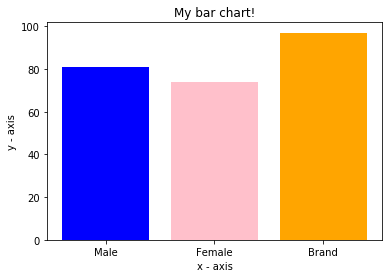

In [86]:
import matplotlib.pyplot as plt
tick_label = ['Male', 'Female','Brand'] 
left = [1, 2,3] 
height = [misspelled_correction(Male_Word),misspelled_correction(Female_Word),misspelled_correction(Brand_Word)] 
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['blue', 'pink','orange']) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('My bar chart!') 
  
# function to show the plot 
plt.show() 
# thus we conclude males make more mistakes

 Moving on to Ensemble Machine learning Modelling (3 Classification Algorithms)

In [3]:
df=pd.read_csv('Cleaned.csv')
df

,Unnamed: 0,Description,Tweets,Gender
0,0,sing rhythm,robbie responds critic win eddie edward worldt...,male
1,1,author novel filled family drama romance,felt like friend living story retired ian,male
2,2,louis whining squealing,absolutely adore louis start song hit hard fee...,male
3,3,mobile guy er shazam google kleiner perkins ya...,hi looking url use typically see advanced user,male
4,4,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx,female
...,...,...,...,...
18004,20045,rp,fine drink tea love,female
18005,20046,whatever like problem chargernation foreverroy...,greg hardy good player get face dez bryant lea...,male
18006,20047,teambarcelona look lost follow follow heart br...,miss people still never want see,male
18007,20048,anti statist homeschool kid aspiring thoughtle...,noticed tendency pee carpet want say anything p,female


In [6]:
work_data = pd.DataFrame()
work_data["tweet"] = df.Description
work_data["gender"] = df.Gender

In [7]:
work_data.head()   

,tweet,gender
0,sing rhythm,male
1,author novel filled family drama romance,male
2,louis whining squealing,male
3,mobile guy er shazam google kleiner perkins ya...,male
4,ricky wilson best frontman kaiser chief best b...,female


In [8]:
get_female = work_data["gender"] == "female"
get_male = work_data["gender"] == "male"
get_brand = work_data["gender"] == "brand"

In [9]:
female_rows = work_data[get_female]
male_rows = work_data[get_male]
brand_rows = work_data[get_brand]

In [10]:
print("total female tweets: ",female_rows.tweet.count())
print("total male tweets:   ",male_rows.tweet.count())
print("total brand tweets:  ",brand_rows.tweet.count())   

total female tweets:  5433
total male tweets:    5154
total brand tweets:   4094


In [11]:
female_rows.gender = 0     # female
male_rows.gender = 1       # male
brand_rows.gender = 2      # brand

/home/arpit/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
frames = [female_rows, male_rows, brand_rows]
data = pd.concat(frames,ignore_index=True)


In [13]:
data.tail()

,tweet,gender
18004,crowdsourcing innovation finnd connects fed go...,2
18005,raleigh dynamic leader come connect host work ...,2
18006,fun site animal lover get latest animal news b...,2
18007,family go divorce helpful parent talk divorce ...,2
18008,review delectable food picturesque travel kick...,2


In [14]:
data.dropna(inplace=True)
data.isnull().sum()

tweet     0
gender    0
dtype: int64

In [15]:
import re
import nltk as nlp

In [16]:
from nltk.corpus import stopwords
lemma = nlp.WordNetLemmatizer() 

In [17]:
All_tweets = data['tweet']
#All_descriptions = data['Description']
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lematized_tweets = WordNetLemmatizer()
import nltk

In [18]:
tweets_list = []
for tweet in data.tweet:
    tweet = re.sub("[^a-zA-Z]"," ",tweet)
    tweet = tweet.lower()
    tweet = nltk.word_tokenize(tweet)
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    tweet = [lemma.lemmatize(word) for word in tweet]
    tweet = " ".join(tweet)
    tweets_list.append(tweet)

In [20]:
print("Original version: ", data.tweet.iloc[2174])
print("New version:      ", tweets_list[2174])    # no

Original version:  show ankle five minute wireless
New version:       show ankle five minute wireless


Generating the sparse Matrix

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 600

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(tweets_list).toarray()
words = count_vectorizer.get_feature_names()


In [22]:
print("Most used 600 words on all tweets (alphabetically first 100) :", words[:100])

Most used 600 words on all tweets (alphabetically first 100) : ['account', 'activist', 'actor', 'addict', 'adult', 'adventure', 'advocate', 'aka', 'alum', 'amateur', 'amazing', 'america', 'american', 'analyst', 'android', 'angel', 'animal', 'anime', 'app', 'area', 'art', 'artist', 'ask', 'aspiring', 'assistant', 'author', 'available', 'award', 'away', 'awesome', 'baby', 'bad', 'band', 'baseball', 'based', 'basketball', 'beat', 'beautiful', 'beauty', 'beer', 'believe', 'best', 'better', 'big', 'bio', 'bit', 'bitch', 'black', 'blessed', 'blog', 'blogger', 'blue', 'body', 'book', 'booking', 'born', 'bot', 'boy', 'brand', 'breaking', 'bring', 'bringing', 'brother', 'building', 'business', 'ca', 'called', 'canada', 'canadian', 'car', 'card', 'care', 'career', 'cat', 'cause', 'celebrity', 'center', 'ceo', 'certified', 'change', 'channel', 'check', 'chicago', 'chief', 'child', 'christ', 'christian', 'city', 'class', 'club', 'coach', 'coffee', 'college', 'com', 'come', 'comic', 'coming', 'comm

In [23]:
y = data.gender.values
x = sparce_matrix

Splitting the data into train and test

In [24]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

Applying the Random Forest Algorithm

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rfc.score(test_x,test_y)

0.571671773918965

In [27]:
y_head_ml = rfc.predict(test_x)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y,y_head_ml)

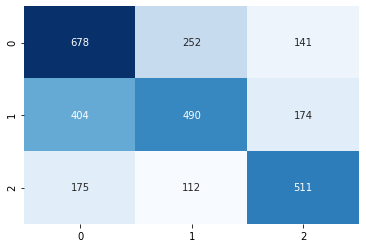

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm,cbar=False,annot=True,cmap="Blues",fmt="d")
plt.show()

Applying SVM

In [30]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred = svclassifier.predict(test_x)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[840 159  72]
 [578 377 113]
 [262  87 449]]
              precision    recall  f1-score   support

           0       0.50      0.78      0.61      1071
           1       0.61      0.35      0.45      1068
           2       0.71      0.56      0.63       798

    accuracy                           0.57      2937
   macro avg       0.60      0.57      0.56      2937
weighted avg       0.59      0.57      0.56      2937



Conclusion 
Brand is easy to seperate but genders are relatively more complex

In [33]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression


Applying Logistic Regression

In [34]:
logreg=LogisticRegression()


In [35]:
logreg.fit(train_x,train_y)


/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logreg.score(test_x,test_y)

0.5846101464078992